In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.float_format',lambda x:'%.4f'%x)
pd.set_option('display.max_columns',None)

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.pipeline import make_pipeline,Pipeline

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler,PolynomialFeatures

from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet,RidgeCV,LassoCV,ElasticNetCV

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,root_mean_squared_error,root_mean_squared_log_error

# Loading Dataset

In [2]:
from sklearn.datasets import fetch_california_housing

In [3]:
data=fetch_california_housing()

In [4]:
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [5]:
df=pd.DataFrame(data.data,columns=data.feature_names)

In [6]:
df['MedHouseVal']=data.target

In [7]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0000,6.9841,1.0238,322.0000,2.5556,37.8800,-122.2300,4.5260
1,8.3014,21.0000,6.2381,0.9719,2401.0000,2.1098,37.8600,-122.2200,3.5850
2,7.2574,52.0000,8.2881,1.0734,496.0000,2.8023,37.8500,-122.2400,3.5210
3,5.6431,52.0000,5.8174,1.0731,558.0000,2.5479,37.8500,-122.2500,3.4130
4,3.8462,52.0000,6.2819,1.0811,565.0000,2.1815,37.8500,-122.2500,3.4220


In [8]:
df.shape

(20640, 9)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0000,3.8707,1.8998,0.4999,2.5634,3.5348,4.7432,15.0001
HouseAge,20640.0000,28.6395,12.5856,1.0000,18.0000,29.0000,37.0000,52.0000
AveRooms,20640.0000,5.4290,2.4742,0.8462,4.4407,5.2291,6.0524,141.9091
AveBedrms,20640.0000,1.0967,0.4739,0.3333,1.0061,1.0488,1.0995,34.0667
Population,20640.0000,1425.4767,1132.4621,3.0000,787.0000,1166.0000,1725.0000,35682.0000
AveOccup,20640.0000,3.0707,10.3860,0.6923,2.4297,2.8181,3.2823,1243.3333
Latitude,20640.0000,35.6319,2.1360,32.5400,33.9300,34.2600,37.7100,41.9500
Longitude,20640.0000,-119.5697,2.0035,-124.3500,-121.8000,-118.4900,-118.0100,-114.3100
MedHouseVal,20640.0000,2.0686,1.1540,0.1500,1.1960,1.7970,2.6472,5.0000


**Observations:**

Max value of AveRooms , Ave Bedrooms , Populationa and AveOccup seems to be suspecious

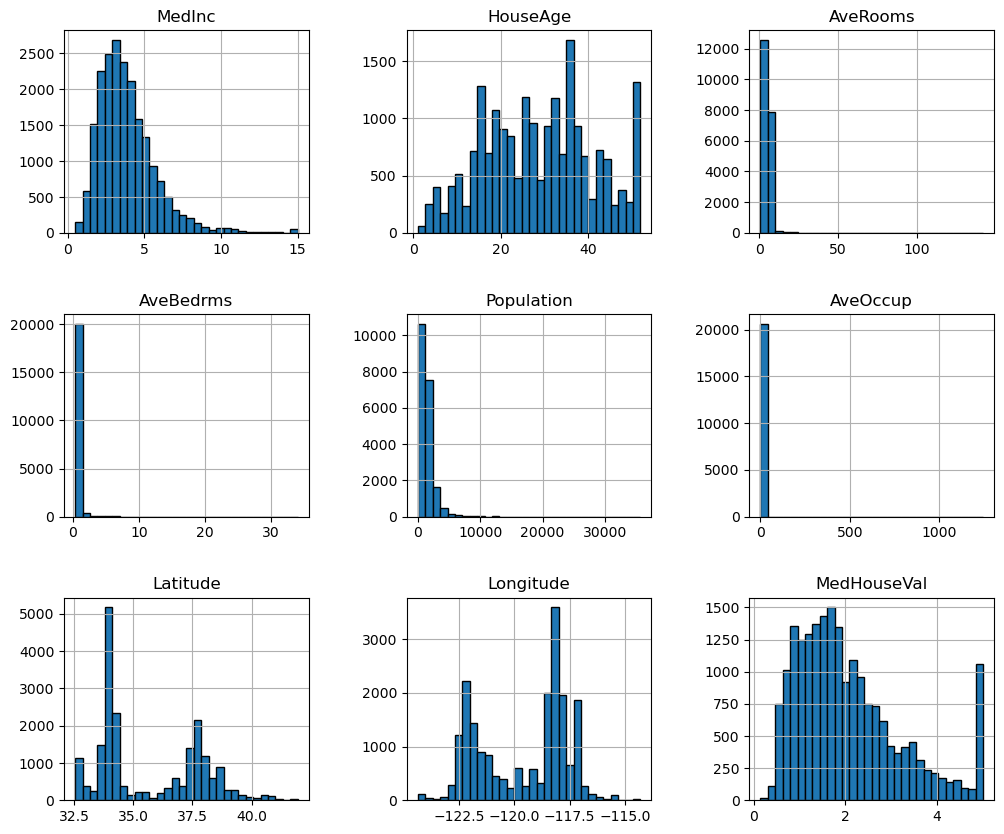

In [11]:
df.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.show()

In [12]:
features_of_interest = ["AveRooms", "AveBedrms", "AveOccup", "Population"]
df[features_of_interest].describe()

,AveRooms,AveBedrms,AveOccup,Population
count,20640.0000,20640.0000,20640.0000,20640.0000
mean,5.4290,1.0967,3.0707,1425.4767
std,2.4742,0.4739,10.3860,1132.4621
min,0.8462,0.3333,0.6923,3.0000
25%,4.4407,1.0061,2.4297,787.0000
50%,5.2291,1.0488,2.8181,1166.0000
75%,6.0524,1.0995,3.2823,1725.0000
max,141.9091,34.0667,1243.3333,35682.0000


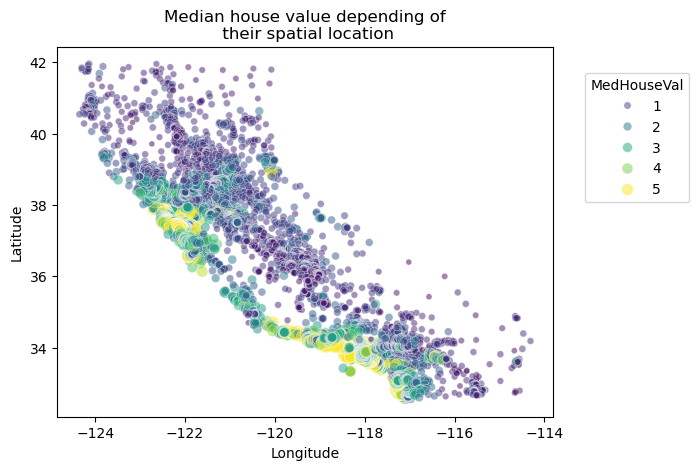

In [13]:
sns.scatterplot(
    data=df,
    x="Longitude",
    y="Latitude",
    size="MedHouseVal",
    hue="MedHouseVal",
    palette="viridis",
    alpha=0.5,
)
plt.legend(title="MedHouseVal", bbox_to_anchor=(1.05, 0.95), loc="upper left")
plt.title("Median house value depending of\n their spatial location")
plt.show()

# EDA

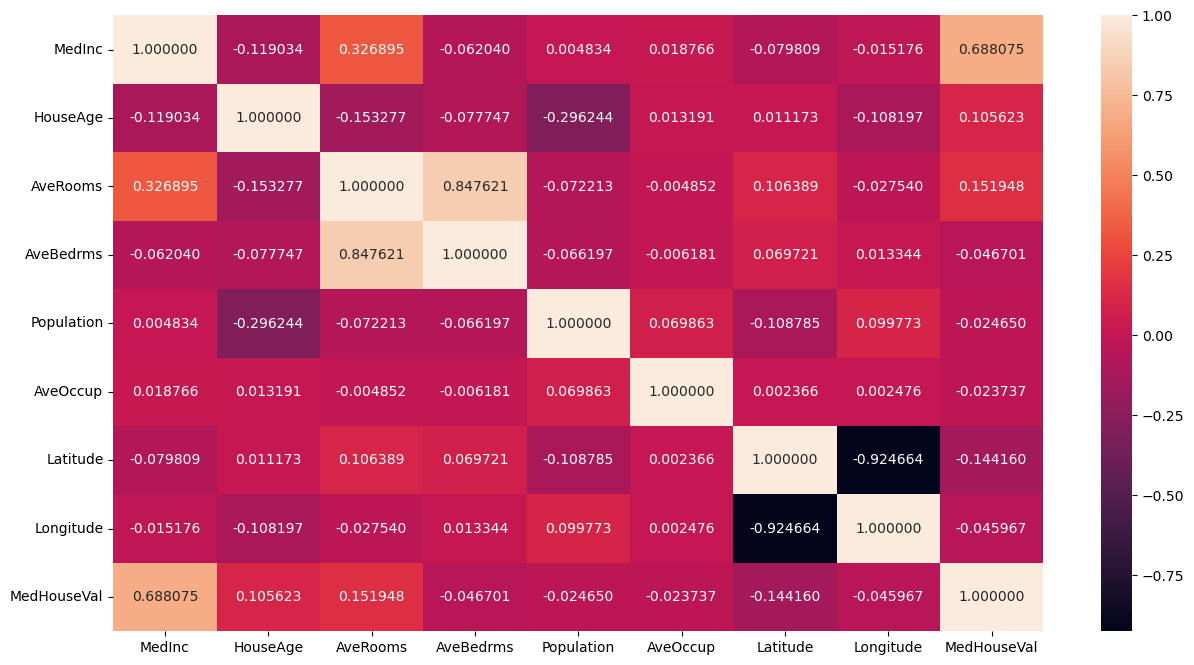

In [14]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True,fmt='f')
plt.show()

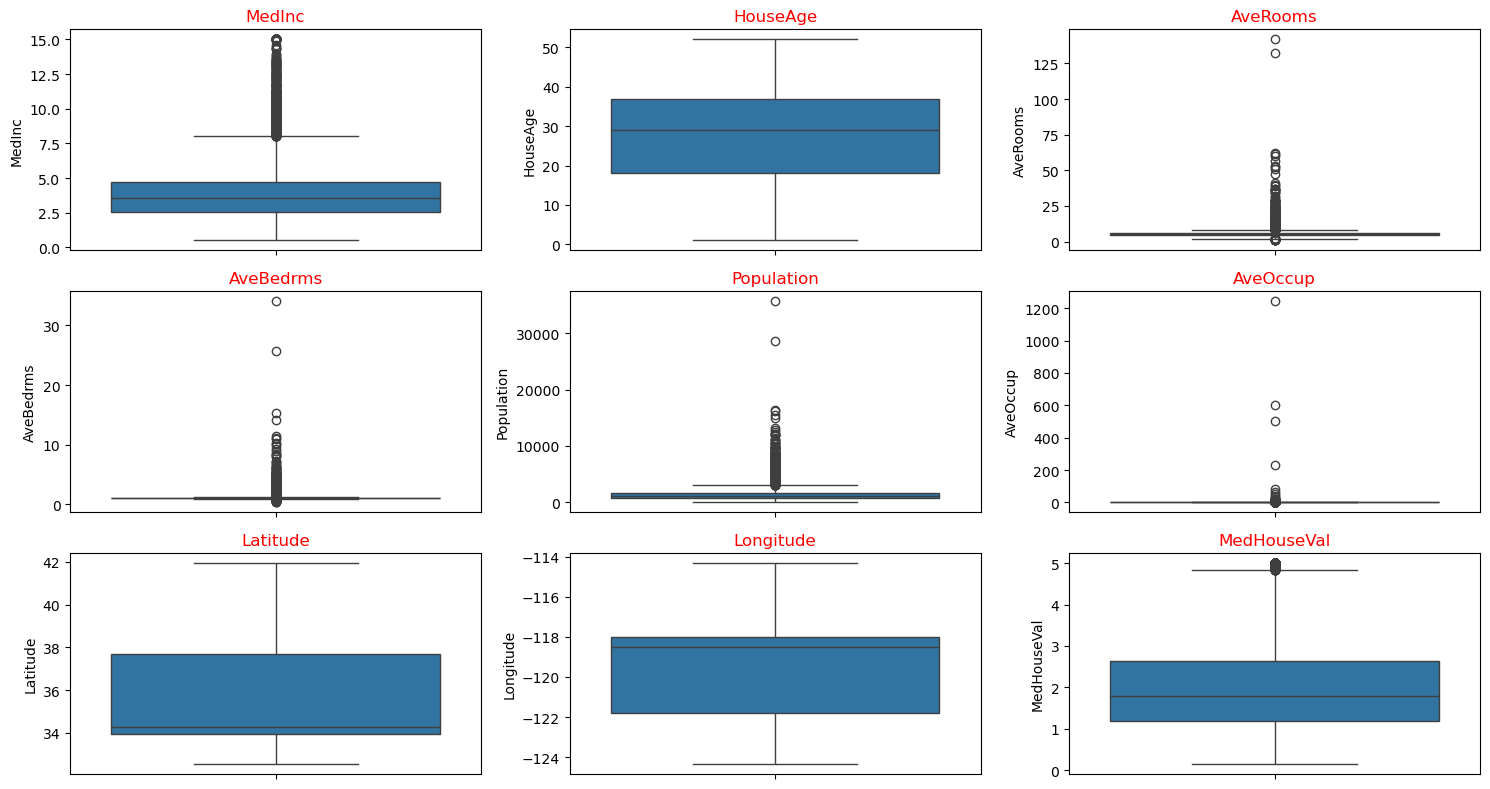

In [15]:
plt.figure(figsize=(15,8))
for i,name in enumerate(df.columns):
    plt.subplot(3,3,i+1)
    sns.boxplot(data=df,y=name)
    plt.title(name,color='red')
    plt.tight_layout()
plt.show()

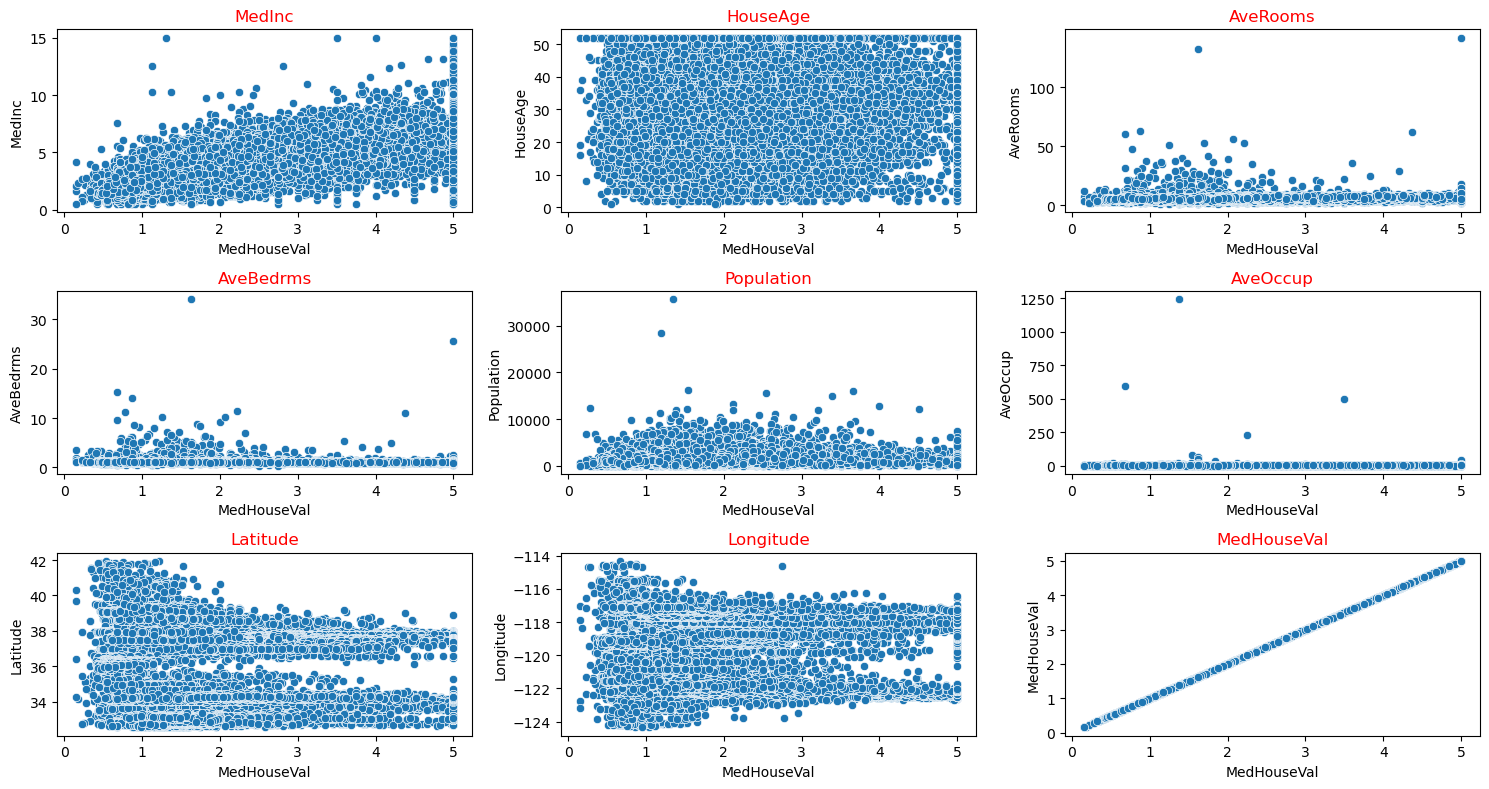

In [16]:
plt.figure(figsize=(15,8))
for i,name in enumerate(df.columns):
    plt.subplot(3,3,i+1)
    sns.scatterplot(data=df,y=name,x='MedHouseVal')
    plt.title(name,color='red')
    plt.tight_layout()
plt.show()

In [17]:
df1=df.copy()

In [18]:
log_columns=['MedInc','AveRooms', 'AveBedrms', 'AveOccup', 'Population']

In [19]:
for i in log_columns:
    df1[i]=np.log1p(df1[i])

In [20]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0000,1.5170,0.3587,0.4054,1.2707,1.5118,1.7480,2.7726
HouseAge,20640.0000,28.6395,12.5856,1.0000,18.0000,29.0000,37.0000,52.0000
AveRooms,20640.0000,1.8287,0.2319,0.6131,1.6939,1.8292,1.9534,4.9622
AveBedrms,20640.0000,0.7320,0.1054,0.2877,0.6962,0.7172,0.7417,3.5573
Population,20640.0000,7.0255,0.7362,1.3863,6.6695,7.0622,7.4536,10.4824
AveOccup,20640.0000,1.3516,0.2075,0.5261,1.2325,1.3398,1.4545,7.1264
Latitude,20640.0000,35.6319,2.1360,32.5400,33.9300,34.2600,37.7100,41.9500
Longitude,20640.0000,-119.5697,2.0035,-124.3500,-121.8000,-118.4900,-118.0100,-114.3100
MedHouseVal,20640.0000,2.0686,1.1540,0.1500,1.1960,1.7970,2.6472,5.0000


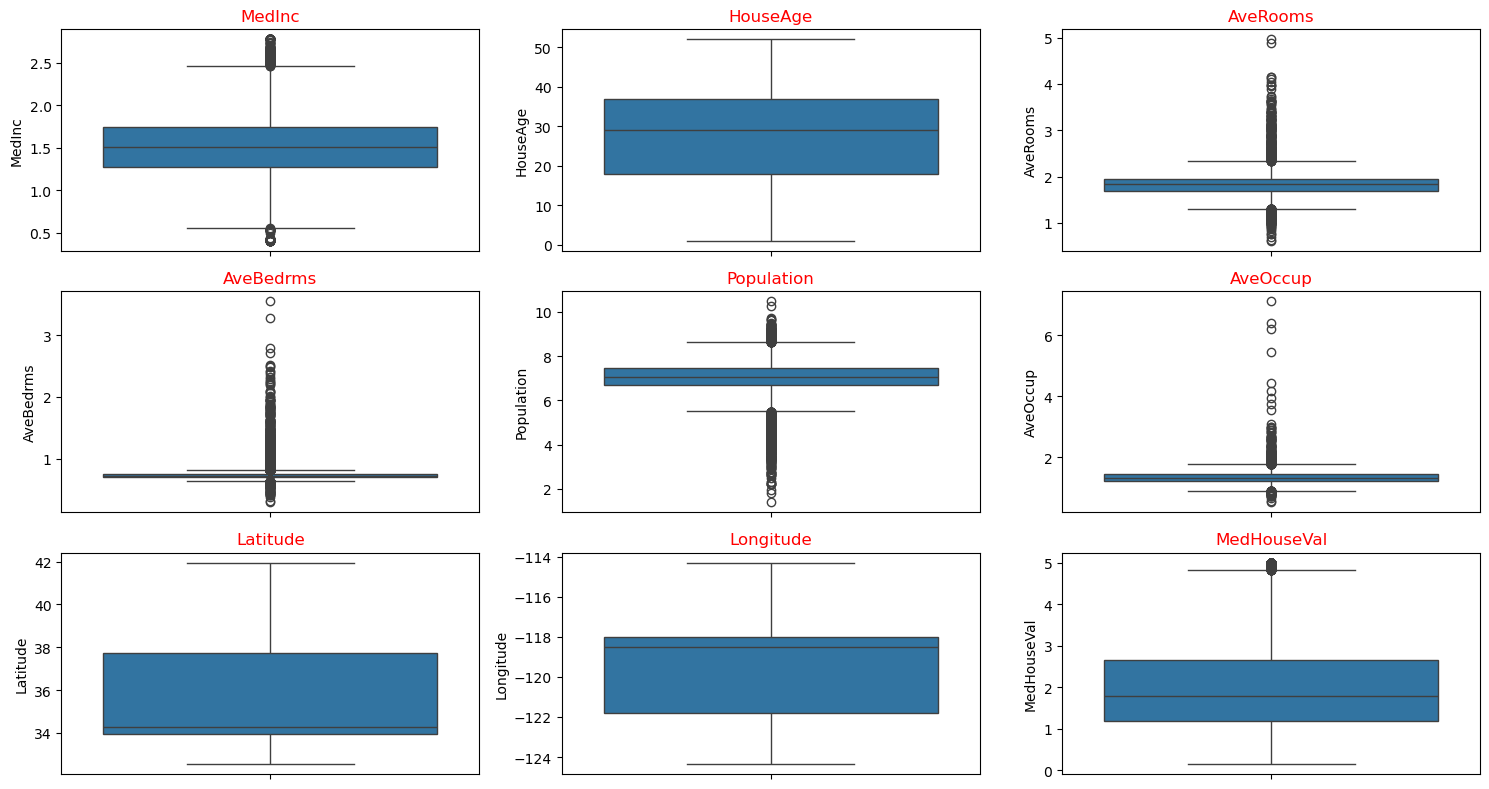

In [21]:
plt.figure(figsize=(15,8))
for i,name in enumerate(df1.columns):
    plt.subplot(3,3,i+1)
    sns.boxplot(data=df1,y=name)
    plt.title(name,color='red')
    plt.tight_layout()
plt.show()

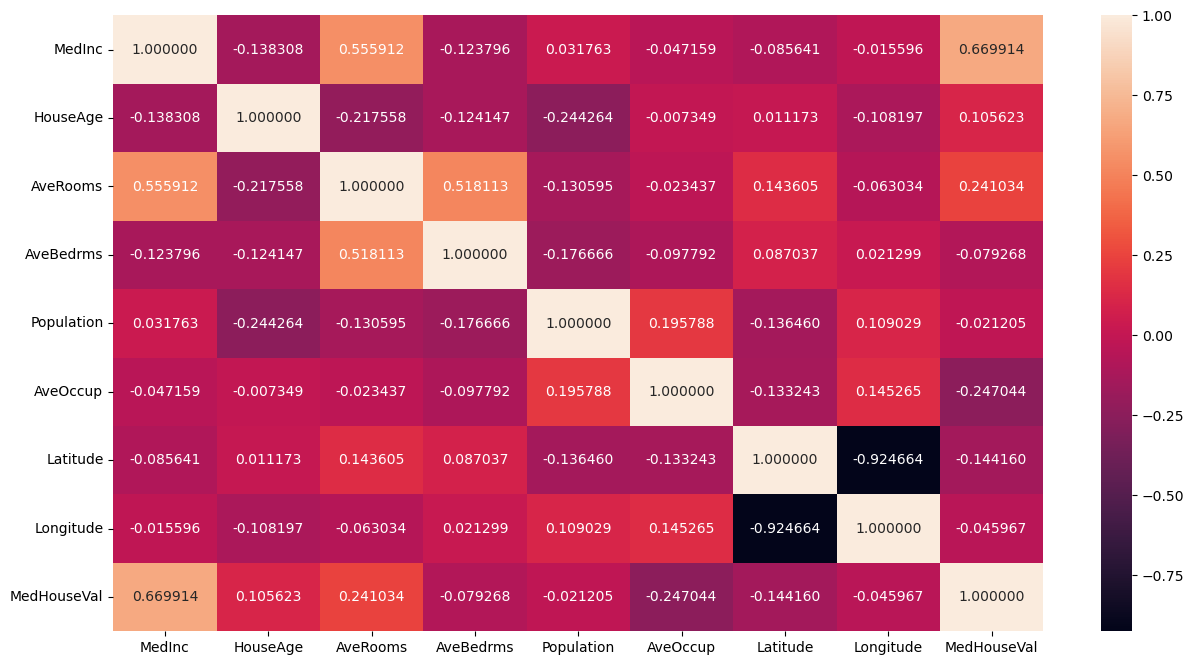

In [22]:
plt.figure(figsize=(15,8))
sns.heatmap(df1.corr(),annot=True,fmt='f')
plt.show()

In [23]:
df1.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,2.2327,41.0000,2.0775,0.7050,5.7777,1.2685,37.8800,-122.2300,4.5260
1,2.2302,21.0000,1.9794,0.6790,7.7841,1.1346,37.8600,-122.2200,3.5850
2,2.1111,52.0000,2.2287,0.7292,6.2086,1.3356,37.8500,-122.2400,3.5210
3,1.8936,52.0000,1.9195,0.7290,6.3261,1.2664,37.8500,-122.2500,3.4130
4,1.5782,52.0000,1.9854,0.7329,6.3386,1.1573,37.8500,-122.2500,3.4220


# Data Split

In [24]:
X=df1.drop('MedHouseVal',axis=1).copy()
y=df1[['MedHouseVal']]

In [25]:
X_temp,X_test,y_temp,y_test=train_test_split(X,y,test_size=0.20,random_state=1)
X_train,X_val,y_train,y_val=train_test_split(X_temp,y_temp,test_size=0.30,random_state=1)

In [26]:
print(X_train.shape,X_val.shape,X_test.shape)

(11558, 8) (4954, 8) (4128, 8)


In [27]:
def performance(model,independent,target):
    mae=mean_absolute_error(target,model.predict(independent))
    mse=mean_squared_error(target,model.predict(independent))
    rmse=root_mean_squared_error(target,model.predict(independent))
    r2=r2_score(target,model.predict(independent))
    adj_r2=(1-(((1-r2)*(independent.shape[0]-1))/(independent.shape[0]-independent.shape[1]-1)))

    result = pd.DataFrame({
        'MAE':mae,
        'MSE':mse,
        'RMSE':rmse,
        'R-Square':r2,
        'Adjusted R-Square':adj_r2
    },index=[0])
    return result

# pipeline

In [28]:
pipeline1=Pipeline([
    ('scaling',StandardScaler()),
    ('Poly',PolynomialFeatures(degree=2)),
    ('model',LinearRegression())
])

In [29]:
pipeline1.fit(X_train,y_train)

Pipeline(steps=[('scaling', StandardScaler()), ('Poly', PolynomialFeatures()),
                ('model', LinearRegression())])

In [30]:
performance(pipeline1,X_train,y_train)

,MAE,MSE,RMSE,R-Square,Adjusted R-Square
0,0.4289,0.3711,0.6092,0.7231,0.7229


In [31]:
performance(pipeline1,X_val,y_val)

,MAE,MSE,RMSE,R-Square,Adjusted R-Square
0,0.4248,0.3869,0.6220,0.7083,0.7078


In [32]:
performance(pipeline1,X_test,y_test)

,MAE,MSE,RMSE,R-Square,Adjusted R-Square
0,0.4289,0.3778,0.6146,0.7120,0.7114


# Pickling the model

In [33]:
import pickle

pickle.dump(pipeline1,open('reg_model.pkl','wb'))

In [34]:
pickled_model=pickle.load(open('reg_model.pkl','rb'))